In [1]:
from sklearn.datasets import make_regression
import numpy as np 

In [2]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)


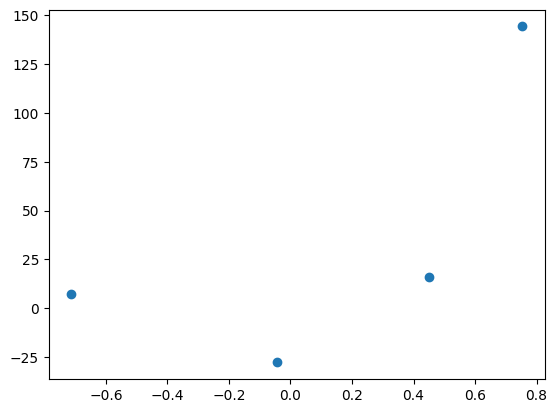

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [4]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [5]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

In [6]:
# finding best theta values using its formula
X_b = np.c_[np.ones((4,1)),X]
X_b

array([[ 1.        , -0.71239066],
       [ 1.        ,  0.45181234],
       [ 1.        , -0.04450308],
       [ 1.        ,  0.75376638]])

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([26.15963284, 78.35063668])

In [8]:
# using LinearRegression class 
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [9]:
print(reg.coef_)
print(reg.intercept_)

[78.35063668]
26.15963284313262


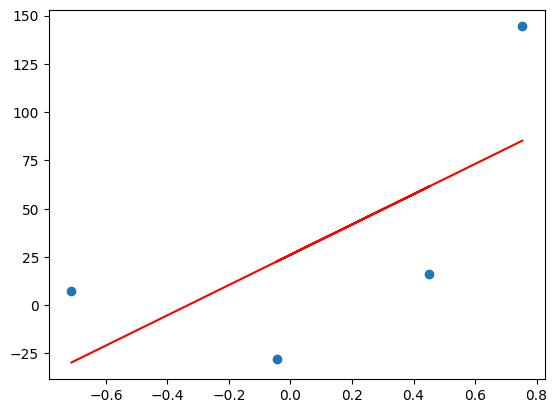

In [10]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [11]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [12]:
# Applying gradient descent by using slope as constant m=78.35
# and lets assume the starting value for intercept b = 0
# y = mx + b
y_pred = ((78.35*X) + 0)
y_pred


array([[-55.81580837],
       [ 35.39949674],
       [ -3.48681619],
       [ 59.05759577]])

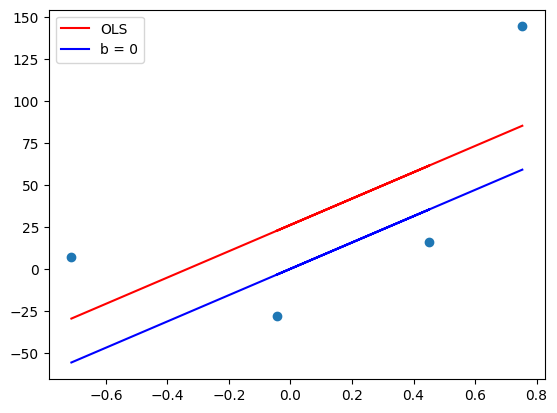

In [13]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='blue',label='b = 0')
plt.legend()
plt.show()

In [14]:
m = 78.35
b = 0

slope_at_b = -2 * np.sum(y - m*X.ravel()-b)
slope_at_b # at b=0

-209.27763408209216

In [15]:
# lets take learning rate = 0.1
lr = 0.1

step_size = lr*slope_at_b
step_size

-20.927763408209216

In [16]:
# calculating the new intercept 
b = b - step_size
b

20.927763408209216

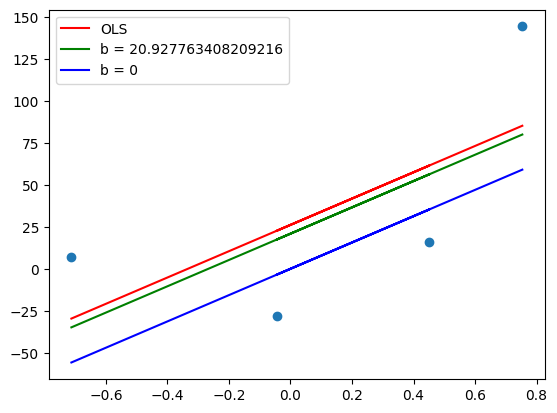

In [17]:
# lets see the line now
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='green',label='b = {}'.format(b))
plt.plot(X,y_pred,color='blue',label='b = 0')
plt.legend()
plt.show()

In [18]:
# 2nd iteration 
slope_at_b = -2*np.sum(y - m*X.ravel() - b) #b=20.927763.....
slope_at_b

-41.85552681641843

In [19]:
step_size = slope_at_b*lr
step_size

-4.185552681641844

In [20]:
b = b - step_size
b

25.11331608985106

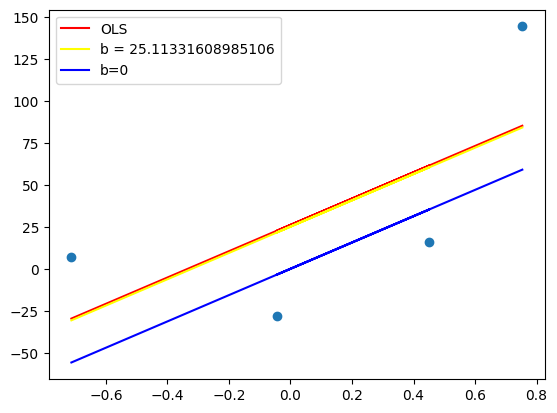

In [21]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='yellow',label='b = {}'.format(b))
plt.plot(X,y_pred,color='blue',label='b=0')
plt.legend()
plt.show()

In [22]:
# 3rd iteration 
slope_at_b = -2*np.sum(y - m*X.ravel() - b) # b = 25.11
slope_at_b


-8.371105363283675

In [23]:
step_size = slope_at_b*lr
step_size

-0.8371105363283675

In [24]:
b = b - step_size
b

25.95042662617943

U can see there is very less difference between the slope of 3rd and 2nd iteration

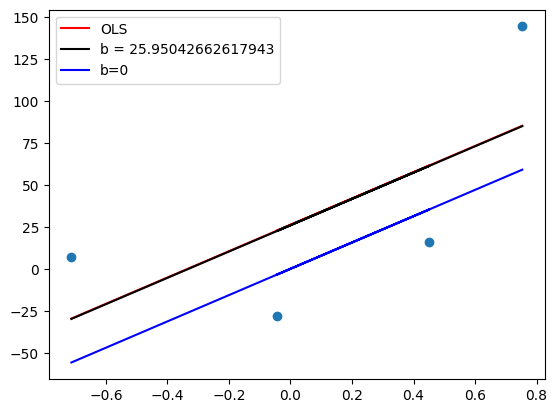

In [25]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='black',label='b = {}'.format(b))
plt.plot(X,y_pred,color='blue',label='b=0')
plt.legend()
plt.show()

this b value is almost near the value derived in start which was 26.15 and on iterating more it can be achieved 

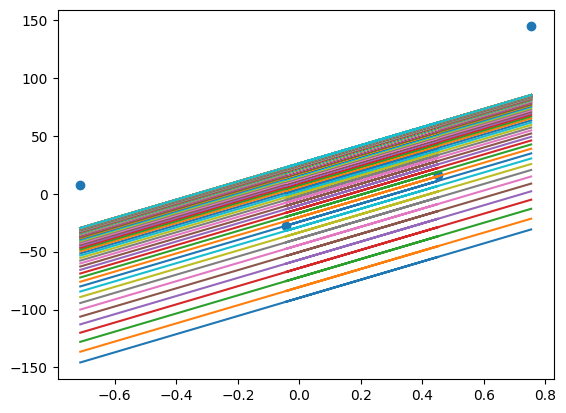

In [26]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    b = b - (lr * loss_slope)
    y_pred = m * X + b

    plt.plot(X,y_pred)
plt.scatter(X,y)